<a href="https://colab.research.google.com/github/saurabhchoughule/rupee/blob/main/Finance_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas_ta
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# To find stocks to exit from portfolio

## Load Required Packages

In [ ]:
nifty50_stocks = {"ADANIENT.NS":["Adani Enterprises Ltd.","Metals & Mining"],\
"ADANIPORTS.NS":["Adani Ports and Special Economic Zone Ltd.","Services"],\
"APOLLOHOSP.NS":["Apollo Hospitals Enterprise Ltd.","Healthcare"],\
"ASIANPAINT.NS":["Asian Paints Ltd.","Consumer Durables"],\
"AXISBANK.NS":["Axis Bank Ltd.","Financial Services"],\
"BAJAJ-AUTO.NS":["Bajaj Auto Ltd.","Automobile and Auto Components"],\
"BAJFINANCE.NS":["Bajaj Finance Ltd.","Financial Services"],\
"BAJAJFINSV.NS":["Bajaj Finserv Ltd.","Financial Services"],\
"BPCL.NS":["Bharat Petroleum Corporation Ltd.","Oil Gas & Consumable Fuels"],\
"BHARTIARTL.NS":["Bharti Airtel Ltd.","Telecommunication"],\
"BRITANNIA.NS":["Britannia Industries Ltd.","Fast Moving Consumer Goods"],\
"CIPLA.NS":["Cipla Ltd.","Healthcare"],\
"COALINDIA.NS":["Coal India Ltd.","Oil Gas & Consumable Fuels"],\
"DIVISLAB.NS":["Divi's Laboratories Ltd.","Healthcare"],\
"DRREDDY.NS":["Dr. Reddy's Laboratories Ltd.","Healthcare"],\
"EICHERMOT.NS":["Eicher Motors Ltd.","Automobile and Auto Components"],\
"GRASIM.NS":["Grasim Industries Ltd.","Construction Materials"],\
"HCLTECH.NS":["HCL Technologies Ltd.","Information Technology"],\
"HDFCBANK.NS":["HDFC Bank Ltd.","Financial Services"],\
"HDFCLIFE.NS":["HDFC Life Insurance Company Ltd.","Financial Services"],\
"HEROMOTOCO.NS":["Hero MotoCorp Ltd.","Automobile and Auto Components"],\
"HINDALCO.NS":["Hindalco Industries Ltd.","Metals & Mining"],\
"HINDUNILVR.NS":["Hindustan Unilever Ltd.","Fast Moving Consumer Goods"],\
"HDFC.NS":["Housing Development Finance Corporation Ltd.","Financial Services"],\
"ICICIBANK.NS":["ICICI Bank Ltd.","Financial Services"],\
"ITC.NS":["ITC Ltd.","Fast Moving Consumer Goods"],\
"INDUSINDBK.NS":["IndusInd Bank Ltd.","Financial Services"],\
"INFY.NS":["Infosys Ltd.","Information Technology"],\
"JSWSTEEL.NS":["JSW Steel Ltd.","Metals & Mining"],\
"KOTAKBANK.NS":["Kotak Mahindra Bank Ltd.","Financial Services"],\
"LT.NS":["Larsen & Toubro Ltd.","Construction"],\
"M&M.NS":["Mahindra & Mahindra Ltd.","Automobile and Auto Components"],\
"MARUTI.NS":["Maruti Suzuki India Ltd.","Automobile and Auto Components"],\
"NTPC.NS":["NTPC Ltd.","Power"],\
"NESTLEIND.NS":["Nestle India Ltd.","Fast Moving Consumer Goods"],\
"ONGC.NS":["Oil & Natural Gas Corporation Ltd.","Oil Gas & Consumable Fuels"],\
"POWERGRID.NS":["Power Grid Corporation of India Ltd.","Power"],\
"RELIANCE.NS":["Reliance Industries Ltd.","Oil Gas & Consumable Fuels"],\
"SBILIFE.NS":["SBI Life Insurance Company Ltd.","Financial Services"],\
"SBIN.NS":["State Bank of India","Financial Services"],\
"SUNPHARMA.NS":["Sun Pharmaceutical Industries Ltd.","Healthcare"],\
"TCS.NS":["Tata Consultancy Services Ltd.","Information Technology"],\
"TATACONSUM.NS":["Tata Consumer Products Ltd.","Fast Moving Consumer Goods"],\
"TATAMOTORS.NS":["Tata Motors Ltd.","Automobile and Auto Components"],\
"TATASTEEL.NS":["Tata Steel Ltd.","Metals & Mining"],\
"TECHM.NS":["Tech Mahindra Ltd.","Information Technology"],\
"TITAN.NS":["Titan Company Ltd.","Consumer Durables"],\
"UPL.NS":["UPL Ltd.","Chemicals"],\
"ULTRACEMCO.NS":["UltraTech Cement Ltd.","Construction Materials"],\
"WIPRO.NS":["Wipro Ltd.","Information Technology"]}

In [ ]:
list(nifty50_stocks.keys())

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [ ]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
import datetime
import math
import time
from tqdm import tqdm




In [ ]:
def getScriptData(scriptCode):
    df = pd.DataFrame().ta.ticker(scriptCode) 
    return df

def getEMADistance(df_script,ema_len = 212):
    ema_df = ta.ema(df_script['Close'],ema_len)    
    ##df = pd.concat([df_script,ema212])
    cmp = df_script['Close'].iloc[-1]
    ema = ema_df.iloc[-1]
    return round(((cmp-ema)/cmp)*100,2)


def runStartegy(stocks):
    portfolio_dict = {}
    for stock in stocks:
        try:
            stock_data = getScriptData(stock)
            portfolio_dict[stock] = getEMADistance(stock_data,212)
        except:
            print(f"Error in stock {stock}")
        time.sleep(5)
    return portfolio_dict

In [ ]:


portfolio_stocks = ['APOLLO.NS','ASIANPAINT.NS','BALKRISIND.NS','BANKBARODA.NS','BSE.NS','CAMS.NS','CPSEETF.NS'\
                    ,'EMBASSY.NS','FEDERALBNK.NS','GODFRYPHLP.NS','GOLDBEES.NS','ITC.NS','MANAPPURAM.NS','MCDOWELL-N.NS','NESTLEIND.NS'\
                    ,'PIDILITIND.NS','RELIANCE.NS','SUNPHARMA.NS','TITAN.NS','TVSMOTOR.NS','VBL.NS']
                    
removed_stocks = ['ATUL.NS','VINATIORGA.NS','DMART.NS']
pf_df = runStartegy(portfolio_stocks)

In [ ]:
pf_dict_em12_distance = pd.DataFrame({"symbol":list(pf_df.keys()),"ema12_dist":list(pf_df.values())})

In [ ]:
pf_dict_em12_distance.sort_values(by=['ema12_dist']).head(100)

,symbol,ema12_dist
7,EMBASSY.NS,-3.67
5,CAMS.NS,-2.18
12,MANAPPURAM.NS,-0.88
4,BSE.NS,0.47
16,RELIANCE.NS,0.57
8,FEDERALBNK.NS,2.19
17,SUNPHARMA.NS,3.13
9,GODFRYPHLP.NS,4.15
15,PIDILITIND.NS,6.27
10,GOLDBEES.NS,6.64


In [ ]:
pf_dict_em12_distance.sort_values(by=['ema12_dist']).head(100)

,symbol,ema12_dist
7,EMBASSY.NS,-6.43
4,BSE.NS,-6.05
5,CAMS.NS,-5.53
12,MANAPPURAM.NS,-3.62
8,FEDERALBNK.NS,1.08
17,SUNPHARMA.NS,1.73
16,RELIANCE.NS,2.70
1,ASIANPAINT.NS,4.50
15,PIDILITIND.NS,5.18
13,MCDOWELL-N.NS,5.79


# Momentum Stocks -St1

In [ ]:
def getScriptData(scriptCode):
    df = pd.DataFrame().ta.ticker(scriptCode) 
    return df

In [ ]:
# ta.trend.ADXIndicator(high: Series, low: Series, close: Series, window: int = 14, fillna: bool = False)

def getMomentumKPI(symbol,window=14):
    df = getScriptData(symbol)
    adx_df = ta.adx(df['High'],df['Low'],df['Close'],window,True) 
    ema_df_20 = ta.ema(df['Close'],20)
    ema_df_212 = ta.ema(df['Close'],212)
    df = pd.concat([df,adx_df,ema_df_20,ema_df_212], axis =1)

    df['adx_pct_chg'] = df["ADX_True"].pct_change(2)*100
    df['symbol'] = symbol
    

    return df#.tail(1)

In [ ]:
sample_df_updated = getMomentumKPI('HEROMOTOCO.NS',14)

In [ ]:
sample_df_updated.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ADX_True', 'DMP_14', 'DMN_14', 'EMA_20', 'EMA_212', 'adx_pct_chg',
       'symbol'],
      dtype='object')

In [ ]:
sample_df_updated[['symbol','ADX_True','EMA_20','EMA_212']].tail(100)

,symbol,ADX_True,EMA_20,EMA_212
Date,,,,
2023-01-05 00:00:00+05:30,HEROMOTOCO.NS,7.833258,2661.082581,2593.612499
2023-01-06 00:00:00+05:30,HEROMOTOCO.NS,9.279056,2662.200925,2594.356280
2023-01-09 00:00:00+05:30,HEROMOTOCO.NS,9.279056,2664.122359,2595.182756
2023-01-10 00:00:00+05:30,HEROMOTOCO.NS,10.788670,2662.120285,2595.632689
2023-01-11 00:00:00+05:30,HEROMOTOCO.NS,11.997511,2658.610318,2595.910932
...,...,...,...,...
2023-05-29 00:00:00+05:30,HEROMOTOCO.NS,51.714847,2660.600273,2559.903364
2023-05-30 00:00:00+05:30,HEROMOTOCO.NS,51.749392,2671.890714,2561.962017
2023-05-31 00:00:00+05:30,HEROMOTOCO.NS,40.314063,2680.272542,2563.820589


In [ ]:
sample_pf = ['VBL.NS','ITC.NS']

pf_adx_df = []

for s in tqdm(list(nifty50_stocks.keys())):
    pf_adx_df.append(getMomentumKPI(s,14))    
    time.sleep(3)

pf_merged_df = pd.concat(pf_adx_df,axis =0,ignore_index=False)
pf_merged_df['rank'] = pf_merged_df.groupby('Date')['adx_pct_chg'].rank(method='first')
    



100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


In [ ]:
pf_merged_df[pf_merged_df.ADX_True > 50].sort_values("rank").tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ADX_True,DMP_14,DMN_14,adx_pct_chg,symbol,rank
Date,,,,,,,,,,,,,
2023-06-02 00:00:00+05:30,832.799988,836.599976,826.950012,836.200012,3425989,0.0,0.0,69.803166,38.640502,6.871608,-2.220446e-14,BHARTIARTL.NS,19.0
2023-06-02 00:00:00+05:30,7075.750000,7100.000000,7005.000000,7019.850098,332622,0.0,0.0,65.578604,32.988041,6.857736,7.204902e+00,BAJFINANCE.NS,24.0
2023-06-02 00:00:00+05:30,4637.000000,4718.700195,4635.350098,4661.600098,238477,0.0,0.0,55.376733,30.141100,8.656343,1.531727e+01,BRITANNIA.NS,30.0
2023-06-02 00:00:00+05:30,4839.649902,4878.799805,4806.000000,4857.450195,349168,0.0,0.0,54.791274,31.143938,9.095976,2.938005e+01,APOLLOHOSP.NS,39.0
2023-06-02 00:00:00+05:30,2836.000000,2912.649902,2836.000000,2879.000000,1340726,0.0,0.0,60.515810,39.428751,9.698810,5.011092e+01,HEROMOTOCO.NS,45.0


In [ ]:
momentum_values =[]
for stock in list(nifty50_stocks.keys()):
    momentum_values.append(getMomentumKPI(stock,14))
    time.sleep(3)


In [ ]:
momentum_values

[('ADANIENT.NS', 'BULL TREND EXIST: ADX=62.29'),
 ('ADANIPORTS.NS', 'BULL TREND EXIST: ADX=28.71'),
 ('APOLLOHOSP.NS', 'NO TREND: ADX=23.91'),
 ('ASIANPAINT.NS', 'NO TREND: ADX=22.41'),
 ('AXISBANK.NS', 'BULL TREND EXIST: ADX=38.43'),
 ('BAJAJ-AUTO.NS', 'BULL TREND EXIST: ADX=52.99'),
 ('BAJFINANCE.NS', 'BULL TREND EXIST: ADX=54.48'),
 ('BAJAJFINSV.NS', 'BULL TREND EXIST: ADX=32.70'),
 ('BPCL.NS', 'NO TREND: ADX=13.21'),
 ('BHARTIARTL.NS', 'BULL TREND EXIST: ADX=52.83'),
 ('BRITANNIA.NS', 'BULL TREND EXIST: ADX=40.91'),
 ('CIPLA.NS', 'NO TREND: ADX=19.41'),
 ('COALINDIA.NS', 'NO TREND: ADX=24.27'),
 ('DIVISLAB.NS', 'BULL TREND EXIST: ADX=33.95'),
 ('DRREDDY.NS', 'BEAR TREND EXIST: ADX=29.82'),
 ('EICHERMOT.NS', 'BULL TREND EXIST: ADX=48.62'),
 ('GRASIM.NS', 'BEAR TREND EXIST: ADX=33.82'),
 ('HCLTECH.NS', 'BULL TREND EXIST: ADX=35.25'),
 ('HDFCBANK.NS', 'NO TREND: ADX=14.90'),
 ('HDFCLIFE.NS', 'BULL TREND EXIST: ADX=36.13'),
 ('HEROMOTOCO.NS', 'BULL TREND EXIST: ADX=43.24'),
 ('HINDALCO

In [ ]:
df = pd.DataFrame().ta.ticker("ITC.NS") 

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,3.304063,3.333829,3.294140,3.323907,985500,0.0,0.0
1996-01-02 00:00:00+05:30,3.254452,3.313984,3.148616,3.198227,7470000,0.0,0.0
1996-01-03 00:00:00+05:30,3.056010,3.128111,3.036828,3.095699,15160500,0.0,0.0
1996-01-04 00:00:00+05:30,3.095698,3.174413,3.062624,3.153907,12397500,0.0,0.0
1996-01-05 00:00:00+05:30,3.153907,3.142000,3.089082,3.097020,5008500,0.0,0.0


## Create Viz

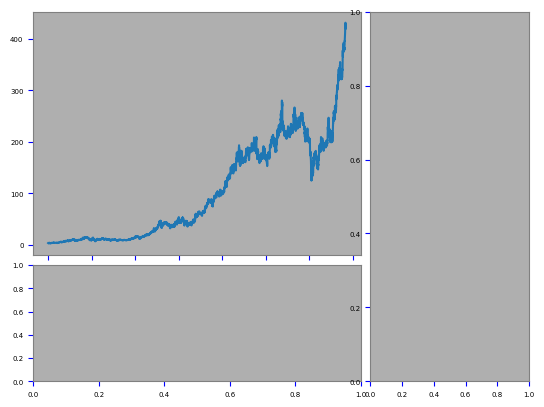

In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(6,9)

ax1 = fig.add_subplot(gs[0:4,0:6])
ax2 = fig.add_subplot(gs[4:6,0:6])
ax3 = fig.add_subplot(gs[0:6,6:9])
#plt.show()

def figure_design(ax):
    ax.set_facecolor('#afafaf')
    ax.tick_params(axis= 'both',labelsize=5, color='blue')
    ax.ticklabel_format(useOffset=False)
    ax.spines['bottom'].set_color('#808080')
    ax.spines['top'].set_color('#808080')
    ax.spines['left'].set_color('#808080')
    ax.spines['right'].set_color('#808080')

figure_design(ax1)
figure_design(ax2)
figure_design(ax3)

ax1.plot(df['Close'])

In [ ]:
def getEquityData(symb):
    import yfinance as yf
    symbolData = yf.Ticker(symb)
    data = symbolData.history(period="max", auto_adjust=True)
    data['time'] = data.index
    #data['sma20']
    
    
    # hist['eq_val'] = (hist['High'] - hist['Close'])/ (hist['High'] - hist['Low'])
    # hist['slope3'] = getBestFitSlope(np.array[hist['Close'].shift(1),hist['Close'].shift(2),hist['Close'].shift(3)])
    return data

In [ ]:
def createKPIs(data):
    
    data['sma10'] = data['Close'].rolling(10).mean()
    data['ema212'] = data['Close'].ewm(span=212, adjust=False).mean()
     
    return data

In [ ]:
eq_data = getEquityData("ITC.NS")

In [ ]:
eq_data_int = createKPIs(eq_data)

In [ ]:
eq_data_int['time'].max().date()

datetime.date(2023, 5, 19)

In [ ]:
import yfinance as yf
brk = yf.Ticker('ITC.NS')

hist = brk.history(period="max", auto_adjust=True)



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-11-05 00:00:00+05:30,39.374949,39.374949,31.320981,33.804287,279042883,0.0,0.0
2004-11-08 00:00:00+05:30,34.363600,35.168996,33.558203,33.647690,82638332,0.0,0.0
2004-11-09 00:00:00+05:30,33.602943,34.050385,33.356850,33.692432,44953063,0.0,0.0
2004-11-10 00:00:00+05:30,33.781912,33.983261,33.558192,33.580563,20896119,0.0,0.0
2004-11-11 00:00:00+05:30,33.714798,33.737171,33.244983,33.312099,19153711,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00+05:30,174.000000,176.750000,173.850006,175.949997,7980565,0.0,0.0
2023-05-16 00:00:00+05:30,176.899994,178.000000,175.500000,177.449997,7874923,0.0,0.0
2023-05-17 00:00:00+05:30,177.449997,177.850006,175.050003,176.000000,6639494,0.0,0.0


In [ ]:
cl = hist['Close'].to_numpy()

EMA(cl,212)

array([ 9911.31539917,  9911.31539917,  9911.31539917, ...,
       37312.        , 37121.20129395, 36739.60064697])

In [ ]:
cl

array([ 33.80428696,  33.64768982,  33.6924324 , ..., 176.        ,
       175.1000061 , 173.30000305])

In [ ]:
def getEquityData(symb):
    symbolData = yf.Ticker(symb)
    hist = symbolData.history(period="max", auto_adjust=True)
    hist['eq_val'] = (hist['High'] - hist['Close'])/ (hist['High'] - hist['Low'])
    hist['slope3'] = getBestFitSlope(np.array[hist['Close'].shift(1),hist['Close'].shift(2),hist['Close'].shift(3)])
    return hist


In [ ]:
getEquityData("RELIANCE.NS")
#['eq_val']

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
def getBestFitSlope(yAr):
    l = len(yAr)
    x = np.array([range(0,l)]).reshape(-1,1)
    model = LinearRegression()
    model.fit(x,yAr)
    return model.coef_[0]


In [ ]:
getBestFitSlope(np.array([15,11,10,11,10,15]))

-0.05714285714285723